## Czesc 1.

In [1]:
from sklearn.datasets import make_regression
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from time import time_ns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
random_state = 244827
n_samples = 2427

In [3]:
x, y = make_regression(n_features=1, random_state=random_state, n_samples=n_samples, noise=16)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state, shuffle=False)

Wygenerowane dane prezentują się w następujący sposób

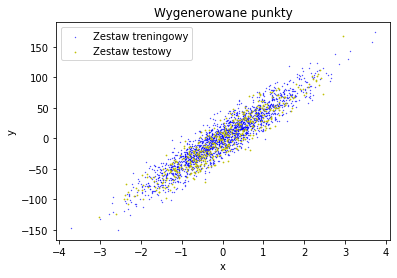

In [4]:
plt.scatter(x_train, y_train, s=0.1, c='b', label='Zestaw treningowy')
plt.scatter(x_test, y_test, s=0.5, c='y', label='Zestaw testowy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Wygenerowane punkty")

plt.show()

In [5]:
def f(w, x):
    return w[0] + x * w[1]

Obliczenie wspolczynników dla funkcji metodą analityczną

In [6]:
ana_start = time_ns()
for i in range(100):
    a = np.concatenate((np.ones((len(x_train), 1)), x_train), 1)
    at = np.transpose(a)
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(at, a)), at), y_train)
ana_stop = time_ns()

predicted_y_analytical = f(w, x_test)

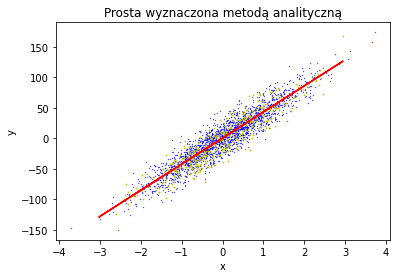

In [7]:
plt.scatter(x_train, y_train, s=0.1, c='b', label='Zestaw treningowy')
plt.scatter(x_test, y_test, s=0.5, c='y', label='Zestaw testowy')
plt.plot(x_test, predicted_y_analytical, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Prosta wyznaczona metodą analityczną")
plt.show()

Funkcja strat dla metody numerycznej

In [8]:
def numerical_loss(w, x, y):
    ret = y - np.matmul(x, w)
    ret = np.matmul(ret.transpose(), ret)
    return 1/len(y) * ret

Poczatkowe wspolczynniki

In [9]:
start = np.ones((2,1))

In [10]:
num_start = time_ns()
for i in range(100):
    a = np.concatenate((np.ones((len(x_train), 1)), x_train), 1)
    minimized = minimize(numerical_loss, start, args=(a, y_train), method='Powell')
num_stop = time_ns()
predicted_y_numerical = f(minimized.x, x_test)

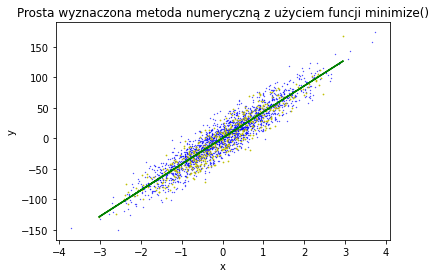

In [11]:
plt.scatter(x_train, y_train, s=0.1, c='b', label='Zestaw treningowy')
plt.scatter(x_test, y_test, s=0.5, c='y', label='Zestaw testowy')
plt.plot(x_test, predicted_y_numerical, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Prosta wyznaczona metoda numeryczną z użyciem funcji minimize()")
plt.show()

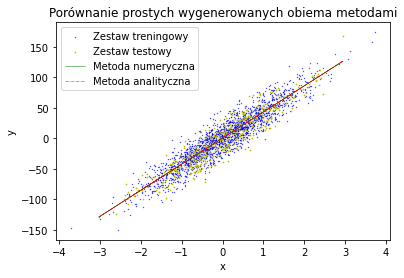

In [12]:
plt.scatter(x_train, y_train, s=0.1, c='b', label='Zestaw treningowy')
plt.scatter(x_test, y_test, s=0.5, c='y', label='Zestaw testowy')
plt.plot(x_test, predicted_y_numerical, c='g', label='Metoda numeryczna', lw=0.5, ls='-')
plt.plot(x_test, predicted_y_analytical, c='r', label='Metoda analityczna', lw=0.5, ls='-.')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Porównanie prostych wygenerowanych obiema metodami")
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [13]:
avg_sqr_err_num = mean_squared_error(y_test, predicted_y_numerical)
avg_sqr_err_an = mean_squared_error(y_test, predicted_y_analytical)

In [14]:
print(f'Metoda analityczna uzyskała \tbłąd średniokwadratowy: {mean_squared_error(y_test, predicted_y_analytical)}, wynik r2: {r2_score(y_test, predicted_y_analytical)} '
      f'i działał średnio {(ana_stop - ana_start) / 100} nanosekund')
print(f'Model LinearRegression uzyskał \tbłąd średniokwadratowy: {mean_squared_error(y_test, predicted_y_numerical)}, wynik r2: {r2_score(y_test, predicted_y_numerical)} '
      f'i działał średnio {(num_stop - num_start) / 100} nanosekund')

Metoda analityczna uzyskała 	błąd średniokwadratowy: 265.60524510621167, wynik r2: 0.8736131906106347 i działał średnio 49605.0 nanosekund
Model LinearRegression uzyskał 	błąd średniokwadratowy: 265.60524481770204, wynik r2: 0.8736131907479204 i działał średnio 1656793.0 nanosekund


## Część 2.

In [15]:
from numpy import genfromtxt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from time import time_ns


In [16]:
def f_wielomian(w, x):
    return np.sum(np.dot(x, w), axis=1, dtype=np.float64)

In [17]:
def weights_analytical(X, y):
    W = np.matmul(np.matmul(np.linalg.pinv(np.matmul(X.T, X)), X.T), y)
    return W

In [18]:
def flap_py_comparision(x, y):

    poly21 = PolynomialFeatures(21)
    x_21 = poly21.fit_transform(x)

    poly9 = PolynomialFeatures(9)
    x_9 = poly9.fit_transform(x)

    start_9_an = time_ns()
    for i in range(100):
        w = weights_analytical(x_9, y)
    stop_9_an = time_ns()
    predicted_y_analytical9 = f_wielomian(w, x_9)

    start_21_an = time_ns()
    for i in range(100):
        w = weights_analytical(x_21, y)
    stop_21_an = time_ns()
    predicted_y_analytical21 = f_wielomian(w, x_21)

    start_9_sk = time_ns()
    for i in range(100):
        reg = LinearRegression().fit(x_9, y)
    stop_9_sk = time_ns()
    y_sk_9 = reg.predict(x_9)

    start_21_sk = time_ns()
    for i in range(100):
        reg = LinearRegression().fit(x_21, y)
    stop_21_sk = time_ns()
    y_sk_21 = reg.predict(x_21)

    plt.scatter(x, y, c='b', label='Wygenerowane dane')
    plt.plot(x, predicted_y_analytical9, c='r', label='Metoda analityczna 9. stopnia')
    plt.plot(x, y_sk_9, c='b', label='sklearn LinearRegression 9. stopnia')
    plt.plot(x, predicted_y_analytical21, c='m', label='Metoda analityczna 21. stopnia')
    plt.plot(x, y_sk_21, c='g', label='sklearn LinearRegression 21. stopnia')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Krzywe wyznaczone różnymi metodami")
    plt.legend()
    plt.show()

    print(f'Metoda analityczna uzyskała \tbłąd średniokwadratowy: {mean_squared_error(y, predicted_y_analytical9)}, wynik r2: {r2_score(y, predicted_y_analytical9)}, '
          f'dla wielomianu 9. stopnia i działał średnio {(stop_9_an - start_9_an) / 100} nanosekund')
    print(f'Model LinearRegression uzyskał \tbłąd średniokwadratowy: {mean_squared_error(y, y_sk_9)}, wynik r2: {r2_score(y, y_sk_9)} '
          f'dla wielomianu 9. stopnia i działał średnio {(stop_9_sk - start_9_sk) / 100} nanosekund')

    print(f'Metoda analityczna uzyskała \tbłąd średniokwadratowy: {mean_squared_error(y, predicted_y_analytical21)}, wynik r2: {r2_score(y, predicted_y_analytical21)} '
          f'dla wielomianu 21. stopnia i działał średnio {(stop_21_an - start_21_an) / 100} nanosekund')
    print(f'Model LinearRegression uzyskał \tbłąd średniokwadratowy: {mean_squared_error(y, y_sk_21)}, wynik r2: {r2_score(y, y_sk_21)} '
          f'dla wielomianu 21. stopnia i działał średnio {(stop_21_sk - start_21_sk) / 100} nanosekund')

In [19]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [20]:
zbior1 = genfromtxt('zbior1.csv', delimiter=',', dtype=np.longdouble)
x1, y1 = zbior1[:, 0], zbior1[:, 1]
x1 = x1.reshape((len(x1), 1))
y1 = y1.reshape((len(y1), 1))
x1 = norm(x1)

In [21]:
zbior2 = genfromtxt('zbior2.csv', delimiter=',', dtype=np.longdouble)
x2, y2 = zbior2[:, 0], zbior2[:, 1]
x2 = x2.reshape((len(x2), 1))
y2 = y2.reshape((len(y2), 1))
x2 = norm(x2)

In [22]:
zbior3 = genfromtxt('zbior3.csv', delimiter=',', dtype=np.longdouble)
x3, y3 = zbior3[:, 0], zbior3[:, 1]
x3 = x3.reshape((len(x3), 1))
y3 = y3.reshape((len(y3), 1))
x3 = norm(x3)

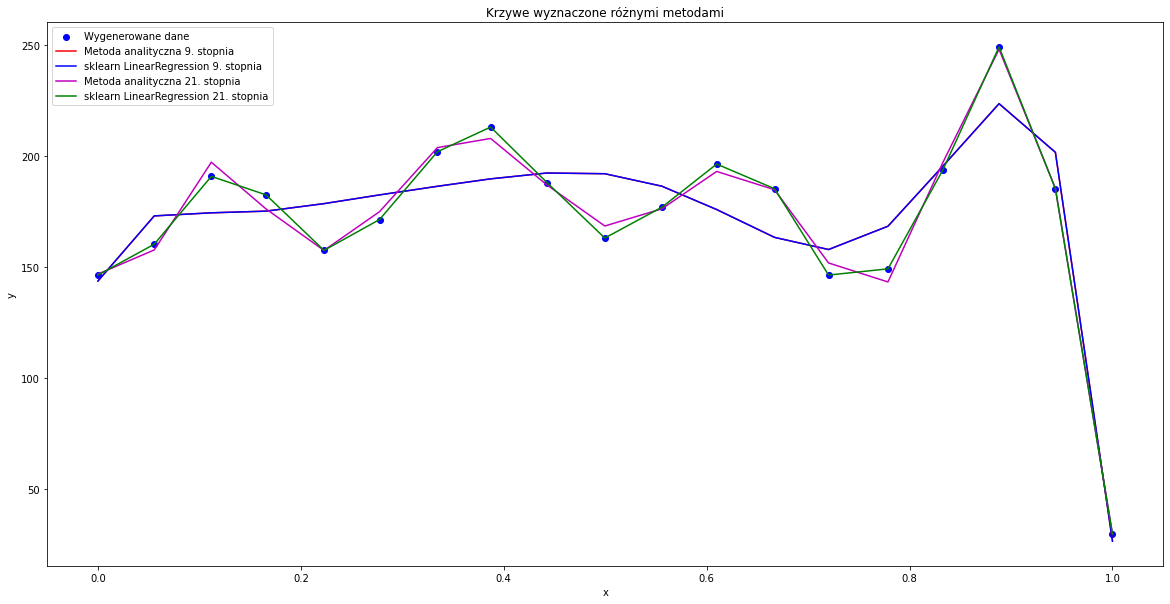

Metoda analityczna uzyskała 	błąd średniokwadratowy: 270.1327517687147, wynik r2: 0.8453308832099279, dla wielomianu 9. stopnia i działał średnio 64488.0 nanosekund
Model LinearRegression uzyskał 	błąd średniokwadratowy: 270.13272863663, wynik r2: 0.8453308964545977 dla wielomianu 9. stopnia i działał średnio 252147.0 nanosekund
Metoda analityczna uzyskała 	błąd średniokwadratowy: 13.142372792543382, wynik r2: 0.9924751101854952 dla wielomianu 21. stopnia i działał średnio 99362.0 nanosekund
Model LinearRegression uzyskał 	błąd średniokwadratowy: 8.710571343599383e-09, wynik r2: 0.9999999999950127 dla wielomianu 21. stopnia i działał średnio 238049.0 nanosekund


In [23]:
flap_py_comparision(x1, y1)

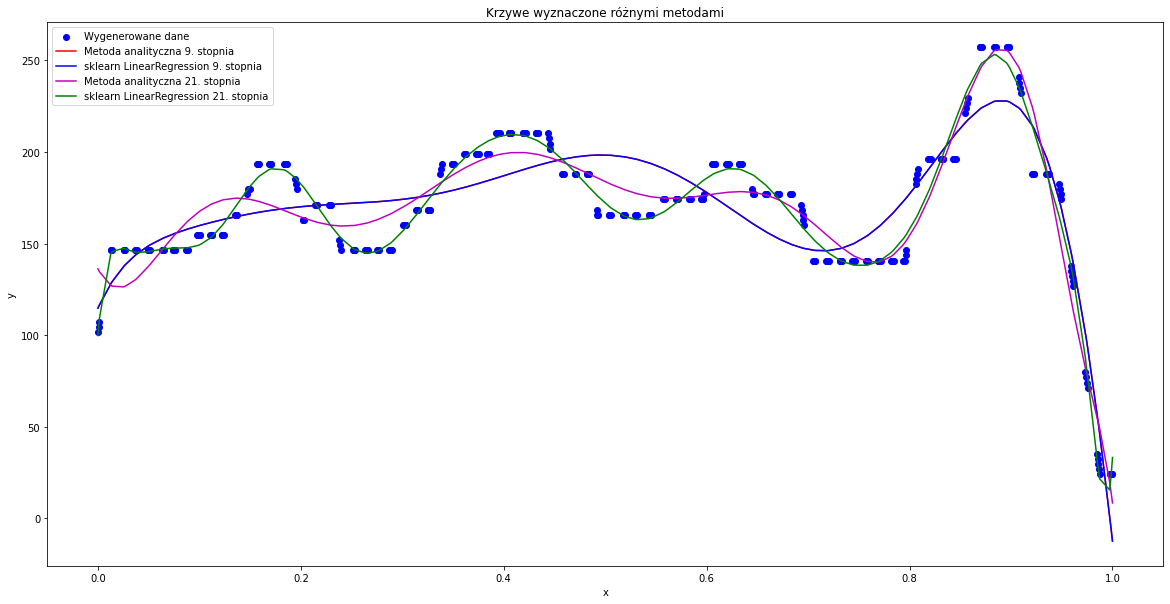

Metoda analityczna uzyskała 	błąd średniokwadratowy: 352.6709059127746, wynik r2: 0.7732419517612092, dla wielomianu 9. stopnia i działał średnio 59517.0 nanosekund
Model LinearRegression uzyskał 	błąd średniokwadratowy: 352.67090455066653, wynik r2: 0.7732419526370087 dla wielomianu 9. stopnia i działał średnio 257917.0 nanosekund
Metoda analityczna uzyskała 	błąd średniokwadratowy: 173.55829286054473, wynik r2: 0.888406616239426 dla wielomianu 21. stopnia i działał średnio 134056.0 nanosekund
Model LinearRegression uzyskał 	błąd średniokwadratowy: 51.935407482433114, wynik r2: 0.9666069090538602 dla wielomianu 21. stopnia i działał średnio 361956.0 nanosekund


In [24]:
flap_py_comparision(x2, y2)

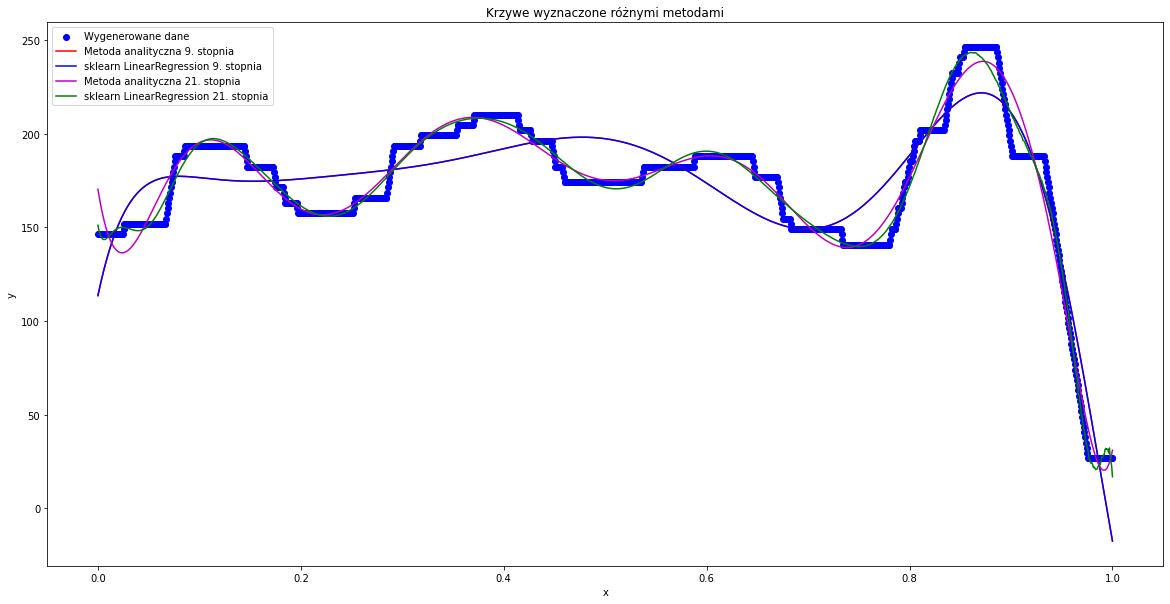

Metoda analityczna uzyskała 	błąd średniokwadratowy: 287.027894146093, wynik r2: 0.7983709655762585, dla wielomianu 9. stopnia i działał średnio 94229.0 nanosekund
Model LinearRegression uzyskał 	błąd średniokwadratowy: 287.02787542234137, wynik r2: 0.7983709787291682 dla wielomianu 9. stopnia i działał średnio 403912.0 nanosekund
Metoda analityczna uzyskała 	błąd średniokwadratowy: 54.18687654553974, wynik r2: 0.9619352410718846 dla wielomianu 21. stopnia i działał średnio 277755.0 nanosekund
Model LinearRegression uzyskał 	błąd średniokwadratowy: 31.02359773603665, wynik r2: 0.9782067938920117 dla wielomianu 21. stopnia i działał średnio 848161.0 nanosekund


In [25]:
flap_py_comparision(x3, y3)

## Część 3.

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [27]:
def ridge_comparision(x, y):

    poly16 = PolynomialFeatures(16, include_bias=False)

    X_ridge = poly16.fit_transform(x)

    self_start = time_ns()
    for i in range(100):
        XT_ridge = np.transpose(X_ridge)
        I = np.identity(16)
        a = 1e-50
        XTX = np.matmul(XT_ridge, X_ridge)
        aI = np.multiply(a, I)
        XI = XTX + aI
        XIIn = np.linalg.pinv(XI)
        Xy = np.matmul(XT_ridge, y)
        w = np.matmul(XIIn, Xy)
    self_stop = time_ns()
    y_self_ridge_test = f_wielomian(w, X_ridge)

    sk_start = time_ns()
    for i in range(100):
        ridge = Ridge(alpha=1e-50)
        est = ridge.fit(X_ridge, y)
    sk_stop = time_ns()
    y_sk_test = est.predict(X_ridge)

    y_self_predicted = f_wielomian(w, X_ridge)
    y_sk_pred = est.predict(X_ridge)

    plt.scatter(x, y, c='b', label='Wygenerowane dane')
    plt.plot(x, y_self_predicted, c='r', label='Krzywa wyznaczona własną implementacją ridge regression')
    plt.plot(x, y_sk_pred, c='g', label='Krzywa wyznaczona przez model Ridge z sklearn')
    plt.title('Ridge regression')
    plt.legend()
    plt.show()

    print(f'Własna implementacja osiągnęła \tMAE: {mean_absolute_error(y, y_self_ridge_test)}, wynik r2: {r2_score(y, y_self_ridge_test)}, sredni czas trwania to {(self_stop - self_start) / 100} nanosekund')
    print(f'Implementacja sklearn osiągnęła MAE: {mean_absolute_error(y, y_sk_test)}, wynik r2: {r2_score(y, y_sk_test)}, sredni czas trwania to {(sk_stop - sk_start) / 100} nanosekund')

In [28]:
yn1 = norm(y1)
yn2 = norm(y2)
yn3 = norm(y3)
yn1 = yn1 - yn1[0]
yn2 = yn2 - yn2[0]
yn3 = yn3 - yn3[0]

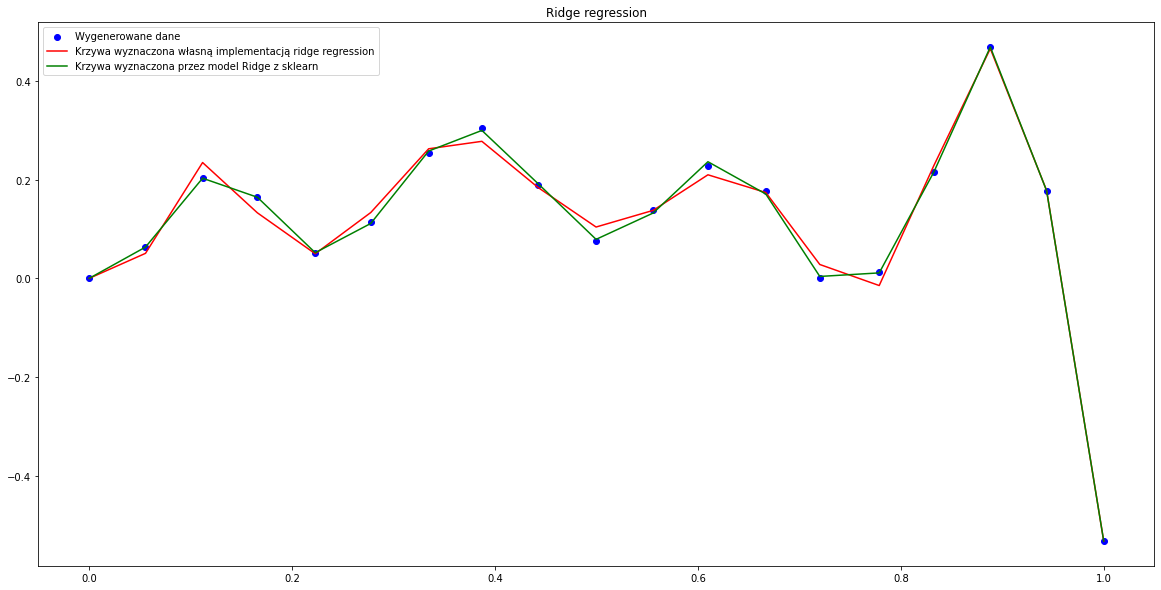

Własna implementacja osiągnęła 	MAE: 0.013812958110709163, wynik r2: 0.9909409113020464, sredni czas trwania to 79357.0 nanosekund
Implementacja sklearn osiągnęła MAE: 0.0024164921115155634, wynik r2: 0.9996554704690767, sredni czas trwania to 337288.0 nanosekund


In [29]:
ridge_comparision(x1, yn1)

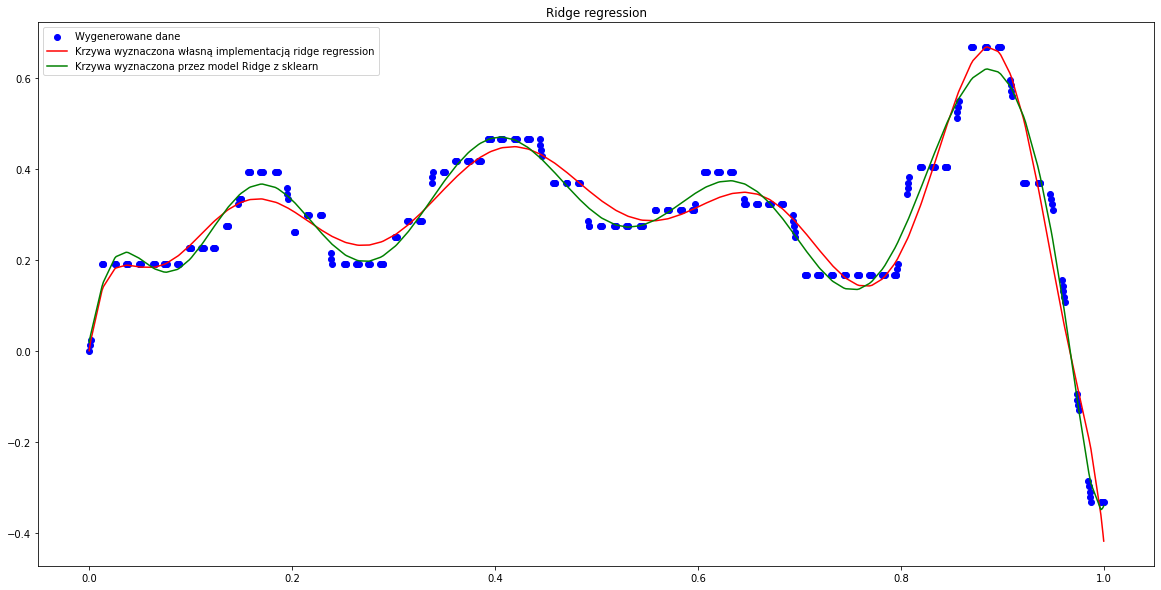

Własna implementacja osiągnęła 	MAE: 0.034035815618164864, wynik r2: 0.9285659651786179, sredni czas trwania to 94241.0 nanosekund
Implementacja sklearn osiągnęła MAE: 0.0265187356985565, wynik r2: 0.9575130326793613, sredni czas trwania to 416638.0 nanosekund


In [30]:
ridge_comparision(x2, yn2)

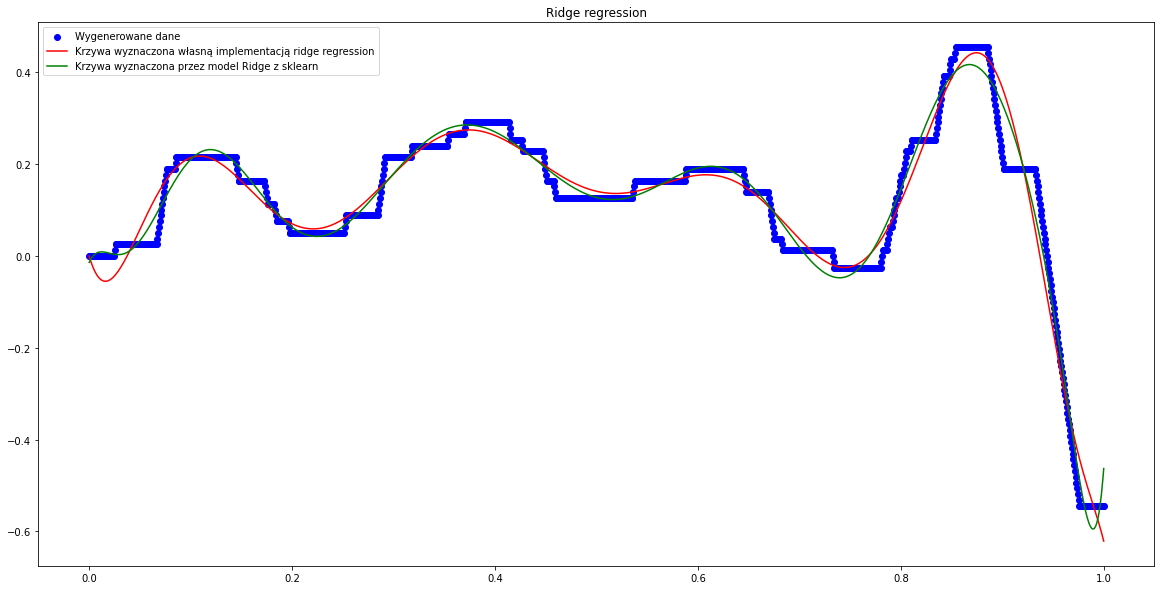

Własna implementacja osiągnęła 	MAE: 0.027152220014248274, wynik r2: 0.9518389855304312, sredni czas trwania to 178551.0 nanosekund
Implementacja sklearn osiągnęła MAE: 0.02205142278543583, wynik r2: 0.9691921988116382, sredni czas trwania to 1235477.0 nanosekund


In [31]:
ridge_comparision(x3, yn3)